# Imports

In [1]:
import pandas as pd
import torch

# Data

In [2]:

file_path = 'data/Reviews.csv'
reviews_df = pd.read_csv(file_path)
reviews_df.head()


source                                            comment Product     date
0  Amazon  How do you write a review on Oreos?  Delicious...       A  00:00.0
1  Amazon  I like this cookies because it satisfies your ...       A  00:00.0
2  Amazon  I love buying this bundle, because it's usuall...       A  00:00.0
3  Amazon  What's not to like you can make Oreos into bas...       A  00:00.0
4  Amazon             This is on our monthly must have list!       A  00:00.0

In [3]:
reviews_df.source.unique()

array(['Amazon', 'Wallmart', 'Target', 'Twitter'], dtype=object)

In [4]:
reviews_df.Product.unique()

array(['A', 'B'], dtype=object)

In [5]:
reviews_df.shape

(38530, 4)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38530 entries, 0 to 38529
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   source   38530 non-null  object
 1   comment  38525 non-null  object
 2   Product  38530 non-null  object
 3   date     38530 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [7]:
reviews_df.isna().sum()

source     0
comment    5
Product    0
date       0
dtype: int64

In [8]:
reviews_df.dropna(axis=0,inplace=True)

In [9]:
reviews_df.isna().sum()

source     0
comment    0
Product    0
date       0
dtype: int64

# Text preprocessing

In [10]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Define a preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove whitespace
    text = text.strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    # Lemmatize words (words are brought to their base word, which is linguistically correct)
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

reviews_df['preprocessed'] = reviews_df['comment'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /Users/ab_/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ab_/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ab_/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
reviews_df.head(3)

source                                            comment Product     date  \
0  Amazon  How do you write a review on Oreos?  Delicious...       A  00:00.0   
1  Amazon  I like this cookies because it satisfies your ...       A  00:00.0   
2  Amazon  I love buying this bundle, because it's usuall...       A  00:00.0   

                                        preprocessed  
0  write review oreo deliciousness package want e...  
1                        like cooky satisfies hunger  
2  love buying bundle usually good price kid love...

In [12]:
preprocessed_reviews = reviews_df['preprocessed']

# Topic modelling using LDA

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


# Convert text data into a bag-of-words model
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(preprocessed_reviews)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_topics = lda_model.fit_transform(data_vectorized)

print(lda_model.components_)


[[0.1        0.1        0.10000383 ... 0.1        0.1        0.1       ]
 [0.1        0.10000905 0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        2.0998845  0.1       ]
 ...
 [0.10002482 0.1        0.10000151 ... 0.10000306 0.1        0.1       ]
 [0.1        0.1        0.10000164 ... 0.1        0.1        0.1       ]
 [0.1        0.10001124 1.27103888 ... 5.8678602  0.10008834 0.1       ]]


In [14]:
lda_topics

array([[0.00384733, 0.00384659, 0.0038475 , ..., 0.00384686, 0.74784686,
        0.00384636],
       [0.02000042, 0.23083304, 0.0200018 , ..., 0.02000486, 0.60915408,
        0.02      ],
       [0.00769527, 0.00769341, 0.00769655, ..., 0.00769303, 0.93075831,
        0.00769231],
       ...,
       [0.01428592, 0.014289  , 0.01428776, ..., 0.01429319, 0.01429221,
        0.56707494],
       [0.01428571, 0.01428597, 0.41885814, ..., 0.01428571, 0.01428571,
        0.01428571],
       [0.03333353, 0.03334054, 0.03333596, ..., 0.03333427, 0.03333379,
        0.03333333]])

In [15]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Number of words to show for each topic
n_top_words = 5

# Call the function to print topics
print_topics(lda_model, vectorizer, n_top_words)




Topic #0:
best amp true god time

Topic #1:
box thank want yes said

Topic #2:
day know need free like

Topic #3:
la le en que el

Topic #4:
happy birthday thanks look hi

Topic #5:
double stuff cream stuffed original

Topic #6:
chocolate toblerone bar white cake

Topic #7:
like let oh follow date

Topic #8:
oreo love cooky milk good

Topic #9:
da die ist der und


# Bert Topic modelling

In [ ]:
from sklearn.cluster import KMeans
from transformers import BertModel, BertTokenizer
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Tokenize and encode sentences in the dataset
encoded_input = tokenizer(list(reviews_df['preprocessed'][:10000]), padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)

# We take the embeddings from the last BERT layer
embeddings = model_output.last_hidden_state.mean(dim=1).numpy()

# Use KMeans clustering on BERT embeddings
num_clusters = 10  # This is an arbitrary choice 
kmeans_model = KMeans(n_clusters=num_clusters)
kmeans_model.fit(embeddings)

# Predict the cluster IDs for each sentence (which you can interpret as topics)
clusters = kmeans_model.predict(embeddings)

# Assign the cluster IDs back to the original dataframe
reviews_df['topic'] = clusters

# Review the cluster assignments and the text to infer topics
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(reviews_df[reviews_df['topic'] == i]['preprocessed'].values[:5])  # Adjust the number of values as needed


> issue with mac for torch

# sentiment analysis

In [16]:
from textblob import TextBlob

#  using TextBlob for sentiment analysis
reviews_df['sentiment'] = reviews_df['preprocessed'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [18]:
average_sentiment = reviews_df['sentiment'].mean()
print(f'Average sentiment score: {average_sentiment}')


Average sentiment score: 0.14238058870077314


In [24]:
positive_reviews = reviews_df[reviews_df['sentiment'] > 0].count()
negative_reviews = reviews_df[reviews_df['sentiment'] < 0].count()
neutral_reviews = reviews_df[reviews_df['sentiment'] == 0].count()

print(f'Positive reviews: {positive_reviews}')
print(f'Negative reviews: {negative_reviews}')
print(f'Neutral reviews: {neutral_reviews}')


Positive reviews: source          15794
comment         15794
Product         15794
date            15794
preprocessed    15794
sentiment       15794
dtype: int64
Negative reviews: source          3947
comment         3947
Product         3947
date            3947
preprocessed    3947
sentiment       3947
dtype: int64
Neutral reviews: source          18784
comment         18784
Product         18784
date            18784
preprocessed    18784
sentiment       18784
dtype: int64


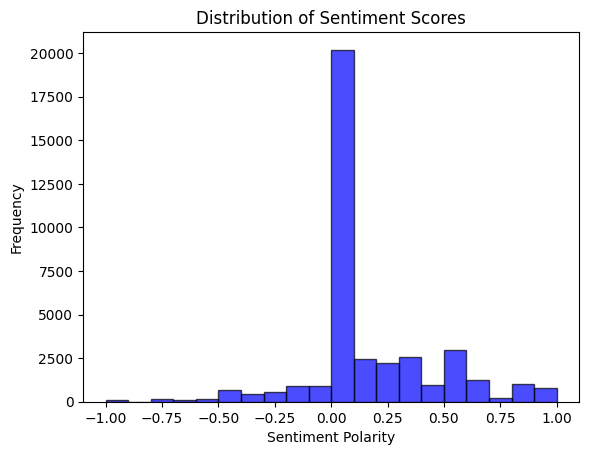

In [20]:
import matplotlib.pyplot as plt

plt.hist(reviews_df['sentiment'], bins=20, color='blue', edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [25]:
highly_positive_reviews = reviews_df[reviews_df['sentiment'] >= 0.9]
highly_positive_reviews


source                                            comment Product  \
21      Amazon                                          Excellent       A   
50      Amazon              OREOS YOUR THE BEST COOKIE EVER STILL       A   
57      Amazon                                   Best of the best       A   
82      Amazon  How’d you expect I’m gonna be like some hater ...       A   
85      Amazon               The flavor and freshness was awesome       A   
...        ...                                                ...     ...   
38187  Twitter                               best food fight ever       B   
38278  Twitter                               know best need drama       B   
38284  Twitter                                           nah best       B   
38368  Twitter                                        awesome lol       B   
38446  Twitter                           omg interaction tho best       B   

             date                                       preprocessed  \
21        00:00.0                                          excellent   
50        00:00.0                        oreo best cookie ever still   
57        00:00.0                                          best best   
82        00:00.0  how’d expect i’m gonna like hater doesn’t like...   
85        00:00.0                           flavor freshness awesome   
...           ...                                                ...   
38187  23-05-2018                               best food fight ever   
38278  23-05-2018                               know best need drama   
38284  23-05-2018                                           nah best   
38368  22-05-2018                                        awesome lol   
38446  22-05-2018                           omg interaction tho best   

       sentiment  
21           1.0  
50           1.0  
57           1.0  
82           1.0  
85           1.0  
...          ...  
38187        1.0  
38278        1.0  
38284        1.0  
38368        0.9  
38446        1.0  

[850 rows x 6 columns]

In [26]:
highly_negative_reviews = reviews_df[reviews_df['sentiment'] <= -0.9]
highly_negative_reviews

source                                            comment Product  \
1602    Amazon  Thought I was getting 4 boxes and a heck of a ...       A   
1605    Amazon                                 Worst shipped item       A   
1692    Amazon  Awful! Only one box was sent when it is advert...       A   
3679    Target    Taste is awful. doesn't even taste like coffee.       A   
3737    Target                  nasty, artifical chemically taste       A   
...        ...                                                ...     ...   
35621  Twitter                                      dont buy evil       B   
35833  Twitter    toblerone could disgusting spineless politician       B   
36042  Twitter                         ha become halal guy insane       B   
37362  Twitter  cause shrinkflation brexit forget either way t...       B   
38437  Twitter                                        evil genius       B   

             date                                       preprocessed  \
1602      00:00.0  thought getting box heck deal receive one box ...   
1605      00:00.0                                 worst shipped item   
1692      00:00.0                  awful one box sent advertised box   
3679      45:05.7          taste awful doesnt even taste like coffee   
3737      45:05.8                   nasty artifical chemically taste   
...           ...                                                ...   
35621  18-12-2018                                      dont buy evil   
35833  18-12-2018    toblerone could disgusting spineless politician   
36042  17-12-2018                         ha become halal guy insane   
37362  06-08-2018  cause shrinkflation brexit forget either way t...   
38437  22-05-2018                                        evil genius   

       sentiment  
1602        -1.0  
1605        -1.0  
1692        -1.0  
3679        -1.0  
3737        -1.0  
...          ...  
35621       -1.0  
35833       -1.0  
36042       -1.0  
37362       -1.0  
38437       -1.0  

[101 rows x 6 columns]

# Zero Shot learning classification

In [16]:
from transformers import pipeline

# Load a zero-shot classification model
classifier = pipeline("zero-shot-classification")

# Classify text data
classes = ['Product', 'Price', 'Promotion', 'Placement']


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
sample = reviews_df.sample(100)

In [15]:
# sample

In [17]:
def classify_text(text, classifier, candidate_labels):
    if not text or not candidate_labels:
        return None  # or a default value, e.g., 'Unclassified'
    return classifier(text, candidate_labels=candidate_labels)['labels'][0]

sample['category'] = sample['preprocessed'].apply(lambda x: classify_text(x, classifier, classes))


In [18]:
sample

source                                            comment Product  \
25583  Twitter            sin duda algunade los mejores chocolate       B   
7411   Twitter  received wonderful yummy gift wonderful friend...       A   
9850   Twitter  thanks lot launch freezer made impossible anyo...       A   
4245    Target  Nothing is better than a double stuffed Oreo!!...       A   
5741   Twitter            yes feel team slowly becoming love love       A   
...        ...                                                ...     ...   
3338    Target  I always tend to teach for Oreos when I’m crav...       A   
28714  Twitter                                  mmm bad like year       B   
28923  Twitter  ahora que lo dice veo el oso ten idea que la c...       B   
7240   Twitter                                       corn pudding       A   
37962  Twitter  brain cell ha helped convict many men like una...       B   

             date                                       preprocessed  \
25583  03-11-2021            sin duda algunade los mejores chocolate   
7411      00:00.0  received wonderful yummy gift wonderful friend...   
9850      00:00.0  thanks lot launch freezer made impossible anyo...   
4245      45:07.2  nothing better double stuffed oreo taste delic...   
5741      00:00.0            yes feel team slowly becoming love love   
...           ...                                                ...   
3338      45:04.7  always tend teach oreo i’m craving something s...   
28714  31-08-2020                                  mmm bad like year   
28923  01-08-2020  ahora que lo dice veo el oso ten idea que la c...   
7240      00:00.0                                       corn pudding   
37962  17-06-2018  brain cell ha helped convict many men like una...   

        category  
25583    Product  
7411   Placement  
9850     Product  
4245     Product  
5741   Placement  
...          ...  
3338       Price  
28714  Placement  
28923  Placement  
7240     Product  
37962  Placement  

[100 rows x 6 columns]